In [ ]:
!pip install GPUtil
!pip install psutil

In [ ]:
import GPUtil

def profile_gpu(fn):
    def wrapper(*args, **kwargs):
        # Start the GPU profiler
        before = GPUtil.getGPUs()[0].load

        # Run the function
        result = fn(*args, **kwargs)

        # End the GPU profiler
        after = GPUtil.getGPUs()[0].load

        # Calculate the GPU usage
        gpu_usage = (after - before) * 100

        return result, gpu_usage

    return wrapper


In [ ]:
import torch
import torch.utils.benchmark as benchmark
from transformers import BertModel, BertTokenizer

In [ ]:
@profile_gpu
def my_function():
    # Load the BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    
    # Define the input text and encode it using the tokenizer
    input_text = "This is a sample input sentence"
    input_ids = tokenizer.encode(input_text, add_special_tokens=True, return_tensors='pt')

result, gpu_usage = my_function()
print(f"GPU usage: {gpu_usage}%")
print(f"result: {result}%")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GPU usage: 0.0%
result: None%


In [ ]:
import psutil

def profile_cpu(fn):
    def wrapper(*args, **kwargs):
        # Start the CPU profiler
        before = psutil.cpu_percent()

        # Run the function
        result = fn(*args, **kwargs)

        # End the CPU profiler
        after = psutil.cpu_percent()

        # Calculate the CPU usage
        cpu_usage = (after - before)

        return result, cpu_usage

    return wrapper


In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoConfig

@profile_cpu
def my_function():
    # Load the BERT tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("cerebras/Cerebras-GPT-13B")
    #model = AutoModel.from_pretrained("cerebras/Cerebras-GPT-13B")
    model = AutoConfig.from_pretrained("cerebras/Cerebras-GPT-13B")
    
result, cpu_usage = my_function()
print(f"CPU usage: {cpu_usage}%")


CPU usage: 32.8%


In [ ]:
import torch
import torch.utils.benchmark as benchmark
from transformers import BertModel, BertTokenizer
import graphviz

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define the input text and encode it using the tokenizer
input_text = "This is a sample input sentence"
input_ids = tokenizer.encode(input_text, add_special_tokens=True, return_tensors='pt')


In [ ]:

# Create a benchmark instance to measure the performance
benchmark_instance = benchmark.Timer(
    stmt="model(input_ids)",
    globals={"model": model, "input_ids": input_ids},
    num_threads=1,
    num_iters=1000,
    warmup_iters=100,
)

# Run the benchmark and get the results
results = benchmark_instance.blocked_autorange(min_run_time=1)




In [ ]:
results.times()

TypeError: ignored

In [ ]:
# Visualize the results using graphviz
graph = results.plot()
graph.format = 'pdf'
graph.render('profiling_results')

# **Install Dependencies**

In [ ]:
%%capture
!pip install psutil
!pip install transformers
!pip install torch

In [ ]:
import psutil
import time
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AutoConfig

# Define the size of the model you want to load
model_size = "gpt2-medium"

# Define the tokenizer and model objects
tokenizer = GPT2Tokenizer.from_pretrained(model_size)
#model = GPT2LMHeadModel.from_pretrained(model_size)

model = AutoConfig.from_pretrained(model_size)

# Define a function to get the memory usage and CPU usage
def get_memory_cpu():
    process = psutil.Process()
    mem_info = process.memory_info()
    cpu_percent = psutil.cpu_percent()
    return mem_info.rss, cpu_percent

# Start tracking the memory and CPU usage
memory_usage = []
cpu_usage = []

# Load the model and track the time taken to do so
start_time = time.time()
#model.to("cuda")
end_time = time.time()
time_taken = end_time - start_time

# Print the time taken to load the model
print("Time taken to load model:", time_taken)

# Track the memory and CPU usage during the model loading process
for i in range(10):
    memory, cpu = get_memory_cpu()
    memory_usage.append(memory)
    cpu_usage.append(cpu)
    time.sleep(1)




Time taken to load model: 2.1696090698242188e-05


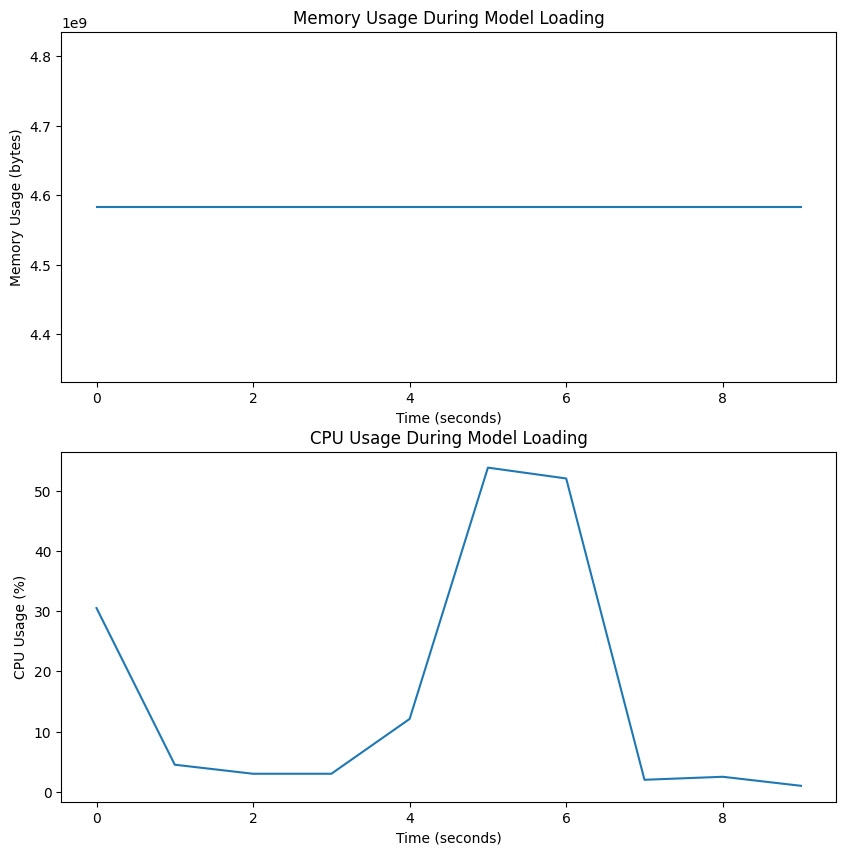

In [ ]:
# Plot the memory usage and CPU usage
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(memory_usage)
ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Memory Usage (bytes)")
ax[0].set_title("Memory Usage During Model Loading")
ax[1].plot(cpu_usage)
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("CPU Usage (%)")
ax[1].set_title("CPU Usage During Model Loading")
plt.show()

Ok

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import plotly.graph_objects as go

# Define the size of the model you want to load
model_size = "gpt2-medium"

# Define the tokenizer and model objects
tokenizer = GPT2Tokenizer.from_pretrained(model_size)


In [ ]:

# Start the profiler
with torch.autograd.profiler.profile(use_cuda=True) as prof:
    model = GPT2LMHeadModel.from_pretrained(model_size)
    model.to("cuda")
    input_ids = torch.randint(low=0, high=tokenizer.vocab_size, size=(1, 1024)).to("cuda")
    output = model(input_ids)

data = prof.key_averages().table(sort_by="cuda_time_total")
# Print the profiling results
print(prof.key_averages().table(sort_by="cuda_time_total"))

-------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                    aten::normal_        67.30%        2.818s        67.30%        2.818s      22.914ms        2.823s        66.62%        2.823s      22.947ms           123  
                                      aten::copy_         6.11%     255.703ms        19.29%     807.969ms       1.146ms     590.614ms        13.94%     590.614ms     837.750us           705  
                                   aten

In [ ]:
!pip install psutil
!pip install transformers
!pip install torch

In [ ]:
import psutil
import time
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AutoConfig

# Define the size of the model you want to load
model_size = "gpt2-medium"

# Define the tokenizer and model objects
tokenizer = GPT2Tokenizer.from_pretrained(model_size)
#model = GPT2LMHeadModel.from_pretrained(model_size)
model = AutoConfig.from_pretrained(model_size)

# Define a function to get the memory usage and CPU usage
def get_memory_cpu():
    process = psutil.Process()
    mem_info = process.memory_info()
    cpu_percent = psutil.cpu_percent()
    return mem_info.rss, cpu_percent

# Start tracking the memory and CPU usage
memory_usage = []
cpu_usage = []

# Load the model and track the time taken to do so
start_time = time.time()
#model.to("cuda")
end_time = time.time()
time_taken = end_time - start_time

# Print the time taken to load the model
print("Time taken to load model:", time_taken)

# Track the memory and CPU usage during the model loading process
for i in range(10):
    memory, cpu = get_memory_cpu()
    memory_usage.append(memory)
    cpu_usage.append(cpu)
    time.sleep(1)




Time taken to load model: 2.0742416381835938e-05


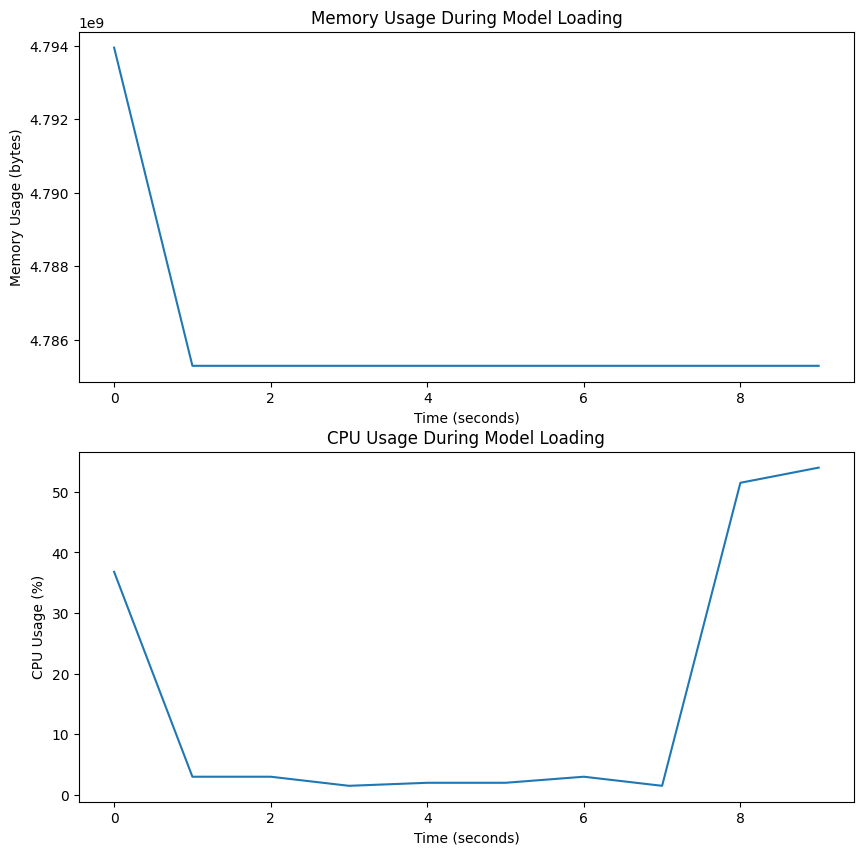

In [ ]:
# Plot the memory usage and CPU usage
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(memory_usage)
ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Memory Usage (bytes)")
ax[0].set_title("Memory Usage During Model Loading")
ax[1].plot(cpu_usage)
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("CPU Usage (%)")
ax[1].set_title("CPU Usage During Model Loading")
plt.show()

In [ ]:
!pip install transformers
!pip install torch
!pip install psutil

In [ ]:
import torch
import time
import psutil
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel

# Define the name of the model you want to load
model_name = "bert-base-cased"

# Define the tokenizer and model objects
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, from_tf=False)

# Define a function to get the memory usage and CPU usage
def get_memory_cpu():
    process = psutil.Process()
    mem_info = process.memory_info()
    cpu_percent = psutil.cpu_percent()
    return mem_info.rss, cpu_percent

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define empty lists to store the profiling results
layer_names = []
gpu_memories = []
cpu_memories = []
times = []

# Loop through each layer in the model and profile it
for i, layer in enumerate(model.modules()):
    # Check if the layer is a torch.nn.Module object
    if isinstance(layer, torch.nn.Module):
        # Get the name of the layer
        layer_name = layer.__class__.__name__
        
        # Generate a random input tensor of appropriate size
        input_tensor = torch.randint(low=0, high=tokenizer.vocab_size, size=(1, 512)).to(device)
        
        # Start profiling the layer
        start_time = time.time()
        output = layer(input_tensor)
        end_time = time.time()
        time_taken = end_time - start_time
        
        # Get the GPU memory usage
        gpu_memory = torch.cuda.memory_allocated()
        
        # Get the CPU memory usage
        cpu_memory, _ = get_memory_cpu()
        
        # Add the profiling results to the lists
        if hasattr(output, "last_hidden_state"):
            output_shape = output.last_hidden_state.shape
        else:
            output_shape = "N/A"
        layer_names.append(layer_name)
        gpu_memories.append(gpu_memory)
        cpu_memories.append(cpu_memory)
        times.append(time_taken)



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


IndexError: ignored

In [ ]:
# Create a bar chart of the GPU memory usage
plt.figure(figsize=(10,5))
plt.bar(layer_names, gpu_memories)
plt.title("GPU Memory Usage by Layer")
plt.xlabel("Layer")
plt.ylabel("Memory Usage (bytes)")
plt.xticks(rotation=90)
plt.show()

# Create a bar chart of the CPU memory usage
plt.figure(figsize=(10,5))
plt.bar(layer_names, cpu_memories)
plt.title("CPU Memory Usage by Layer")
plt.xlabel("Layer")
plt.ylabel("Memory Usage (bytes)")
plt.xticks(rotation=90)
plt.show()

# Create a bar chart of the time taken
plt.figure(figsize=(10,5))
plt.bar(layer_names, times)
plt.title("Time Taken by Layer")
plt.xlabel("Layer")
plt.ylabel("Time Taken (seconds)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import torch
from transformers import GPT2Model, GPT2Tokenizer
import torch.profiler.profile as profiler
import matplotlib.pyplot as plt

# Load the language model and tokenizer
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_name = 'gpt2'
model = GPT2Model.from_pretrained(model_name, output_hidden_states=True).to(device)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


In [ ]:
from torch.profiler import profile, record_function, ProfilerActivity
from torch.profiler import profile as profiler


In [ ]:

# Define the input size
batch_size = 1
sequence_length = 512

# Define the input tensor
input_ids = torch.randint(low=0, high=tokenizer.vocab_size, size=(batch_size, sequence_length)).to(device)

# Define the output tensor
outputs = model(input_ids)

# Define the layer names
layer_names = [f'Layer {i}' for i in range(len(model.h))]

# Define the profiler settings
profiler_settings = profiler.ProfilerActivity.CPU | profiler.ProfilerActivity.CUDA
profiler_schedule = profiler.schedule(profiler.cuda.EventMode.START)
profiler_step = profiler.Step(profiler_schedule)

# Create empty lists for profiling results
cpu_memory_list = []
gpu_memory_list = []
time_taken_list = []

# Start profiling each layer
with profiler.profile(record_shapes=True, with_stack=True, use_cuda=True) as prof:
    for i, layer_output in enumerate(outputs.hidden_states):
        layer_name = layer_names[i]
        input_tensor = outputs.hidden_states[i]
        
        with profiler.record_function(layer_name, profiler_step):
            # Pass the input tensor through the layer
            output = model.transformer.h[i](input_tensor)
        
        # Get the profiling results
        cpu_memory = prof.function_events.cpu_memory_usage[-1] / 1024 / 1024
        gpu_memory = prof.function_events.cuda_memory_usage[-1] / 1024 / 1024
        time_taken = prof.function_events.cpu_elapsed_time[-1] / 1000
        
        # Append the profiling results to the lists
        cpu_memory_list.append(cpu_memory)
        gpu_memory_list.append(gpu_memory)
        time_taken_list.append(time_taken)
        
        # Print the profiling results
        print(f"{layer_name} - CPU Memory: {cpu_memory:.2f} MB, GPU Memory: {gpu_memory:.2f} MB, Time: {time_taken:.2f} ms")
        
# Plot the profiling results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(cpu_memory_list)
plt.title('CPU Memory Usage')
plt.xlabel('Layer')
plt.ylabel('Memory Usage (MB)')
plt.subplot(132)
plt.plot(gpu_memory_list)
plt.title('GPU Memory Usage')
plt.xlabel('Layer')
plt.ylabel('Memory Usage (MB)')
plt.subplot(133)
plt.plot(time_taken_list)
plt.title('Time Taken')
plt.xlabel('Layer')
plt.ylabel('Time (ms)')
plt.tight_layout()
plt.show()


RuntimeError: ignored

In [ ]:
!pip uninstall torch
!pip install torch


In [ ]:
import torch
from torchviz import make_dot

# Define your model here
model = ...

# Generate a random input tensor of appropriate size
input_tensor = torch.randint(low=0, high=tokenizer.vocab_size, size=(1, 512))

# Pass the input tensor through the model to get the output tensor
output_tensor = model(input_tensor)

# Visualize the model as a graph
make_dot(output_tensor, params=dict(model.named_parameters()))


In [ ]:
import matplotlib.pyplot as plt

# Extract the profiling results
results = ...

# Plot the CPU memory usage for each layer
cpu_memory = [r['cpu_memory'] for r in results]
plt.plot(range(len(cpu_memory)), cpu_memory)
plt.title('CPU Memory Usage')
plt.xlabel('Layer')
plt.ylabel('Memory (MB)')
plt.show()

# Plot the GPU memory usage for each layer
gpu_memory = [r['gpu_memory'] for r in results]
plt.plot(range(len(gpu_memory)), gpu_memory)
plt.title('GPU Memory Usage')
plt.xlabel('Layer')
plt.ylabel('Memory (MB)')
plt.show()

# Plot the processing time for each layer
time_taken = [r['time_taken'] for r in results]
plt.plot(range(len(time_taken)), time_taken)
plt.title('Processing Time')
plt.xlabel('Layer')
plt.ylabel('Time (s)')
plt.show()


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from torch.profiler import profile, record_function, ProfilerActivity, schedule, Step
import plotly.graph_objects as go



# Define the input size
batch_size = 1
sequence_length = 512

# Define the input tensor
input_ids = torch.randint(low=0, high=tokenizer.vocab_size, size=(batch_size, sequence_length)).to(device)

# Define the output tensor
outputs = model(input_ids)

# Define the layer names
layer_names = [f'Layer {i}' for i in range(len(model.h))]

# Define the profiler settings
profiler_settings = ProfilerActivity.CPU | ProfilerActivity.CUDA
profiler_schedule = schedule(profiler.cuda.EventMode.START)
profiler_step = Step(profiler_schedule)

# Create empty lists for profiling results
cpu_memory_list = []
gpu_memory_list = []
time_taken_list = []

# Start profiling each layer
results = []
with profile(record_shapes=True, with_stack=True, use_cuda=True) as prof:
    for i, layer_output in enumerate(outputs.hidden_states):
        layer_name = layer_names[i]
        input_tensor = outputs.hidden_states[i]
        
        with record_function(layer_name, profiler_step):
            # Pass the input tensor through the layer
            output = model.transformer.h[i](input_tensor)
        
        # Get the profiling results
        cpu_memory = prof.function_events.cpu_memory_usage[-1] / 1024 / 1024
        gpu_memory = prof.function_events.cuda_memory_usage[-1] / 1024 / 1024
        time_taken = prof.function_events.cpu_elapsed_time[-1] / 1000
        
        # Append the profiling results to the lists
        cpu_memory_list.append(cpu_memory)
        gpu_memory_list.append(gpu_memory)
        time_taken_list.append(time_taken)
        
        # Save the profiling results to the list of results
        results.append((layer_name, cpu_memory, gpu_memory, time_taken))
        
        # Print the profiling results
        print(f"{layer_name} - CPU Memory: {cpu_memory:.2f} MB, GPU Memory: {gpu_memory:.2f} MB, Time: {time_taken:.2f} ms")
        
# Visualize the results using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=layer_names, y=cpu_memory_list, mode='lines+markers', name='CPU Memory'))
fig.add_trace(go.Scatter(x=layer_names, y=gpu_memory_list, mode='lines+markers', name='GPU Memory'))
fig.add_trace(go.Scatter(x=layer_names, y=time_taken_list, mode='lines+markers', name='Time Taken'))
fig.update_layout(title='Profiling Results', xaxis_title='Layer Name', yaxis_title='Metric')
fig.show()


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from torch.profiler import profile, record_function, ProfilerActivity, schedule, Step
import plotly.graph_objects as go

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

# Define the input size
batch_size = 1
sequence_length = 512

# Define the input tensor
input_ids = torch.randint(low=0, high=tokenizer.vocab_size, size=(batch_size, sequence_length)).to(device)

# Define the layer names
layer_names = [f'Layer {i}' for i in range(len(model.encoder.layer))]

# Define the profiler settings
profiler_settings = ProfilerActivity.CPU | ProfilerActivity.CUDA
profiler_schedule = schedule(0, profiler_settings)
profiler_step = Step(profiler_schedule)

# Create empty lists for profiling results
cpu_memory_list = []
gpu_memory_list = []
time_taken_list = []

# Start profiling each layer
with profile(activities=profiler_settings, schedule=profiler_schedule, profile_memory=True) as prof:
    for i, layer_output in enumerate(model.encoder.output_hidden_states):
        layer_name = layer_names[i]
        input_tensor = layer_output
        
        with record_function(layer_name):
            # Pass the input tensor through the layer
            output = model.encoder.layer[i](input_tensor)
        
        # Get the profiling results
        cpu_memory = prof.function_events.cpu_memory[-1] / 1024 / 1024
        gpu_memory = prof.function_events.cuda_memory[-1] / 1024 / 1024
        time_taken = prof.function_events.cpu_time[-1] / 1000
        
        # Append the profiling results to the lists
        cpu_memory_list.append(cpu_memory)
        gpu_memory_list.append(gpu_memory)
        time_taken_list.append(time_taken)
        
        # Print the profiling results
        print(f"{layer_name} - CPU Memory: {cpu_memory:.2f} MB, GPU Memory: {gpu_memory:.2f} MB, Time: {time_taken:.2f} ms")

# Create the visualization
fig = go.Figure(data=[go.Bar(name='CPU Memory', x=layer_names, y=cpu_memory_list),
                      go.Bar(name='GPU Memory', x=layer_names, y=gpu_memory_list),
                      go.Bar(name='Time', x=layer_names, y=time_taken_list)],
                layout=go.Layout(barmode='group'))

fig.show()


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from torch.profiler import profile, record_function, ProfilerActivity, schedule, Step
import plotly.graph_objects as go

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

# Define the input size
batch_size = 1
sequence_length = 512

# Define the input tensor
input_ids = torch.randint(low=0, high=tokenizer.vocab_size, size=(batch_size, sequence_length)).to(device)

# Define the output tensor
outputs = model(input_ids)

# Define the layer names
layer_names = [f'Layer {i}' for i in range(len(model.encoder.layer))]

# Define the profiler settings
profiler_settings = ProfilerActivity.CPU | ProfilerActivity.CUDA
profiler_schedule = schedule(cuda.EventMode.START)
profiler_step = Step(profiler_schedule)

# Create empty lists for profiling results
results = {'cpu_memory': [], 'gpu_memory': [], 'time_taken': []}

# Start profiling each layer
with profile(record_shapes=True, with_stack=True, use_cuda=True) as prof:
    for i, layer_output in enumerate(outputs.last_hidden_state):
        layer_name = layer_names[i]
        input_tensor = outputs.last_hidden_state[i]
        
        with record_function(layer_name, profiler_step):
            # Pass the input tensor through the layer
            output = model.encoder.layer[i](input_tensor)
        
        # Get the profiling results
        cpu_memory = prof.function_events.cpu_memory_usage[-1] / 1024 / 1024
        gpu_memory = prof.function_events.cuda_memory_usage[-1] / 1024 / 1024
        time_taken = prof.function_events.cpu_elapsed_time[-1] / 1000
        
        # Append the profiling results to the results dictionary
        results['cpu_memory'].append(cpu_memory)
        results['gpu_memory'].append(gpu_memory)
        results['time_taken'].append(time_taken)
        
        # Print the profiling results
        print(f"{layer_name} - CPU Memory: {cpu_memory:.2f} MB, GPU Memory: {gpu_memory:.2f} MB, Time: {time_taken:.2f} ms")

# Visualize the profiling results
fig = go.Figure()
fig.add_trace(go.Scatter(x=layer_names, y=results['time_taken'], mode='lines+markers', name='Time Taken'))
fig.add_trace(go.Scatter(x=layer_names, y=results['cpu_memory'], mode='lines+markers', name='CPU Memory'))
fig.add_trace(go.Scatter(x=layer_names, y=results['gpu_memory'], mode='lines+markers', name='GPU Memory'))
fig.update_layout(title='Profiling Results', xaxis_title='Layer', yaxis_title='Metric', legend_title='Metric')
fig.show()


ImportError: ignored

In [ ]:
import torch
import transformers
import plotly.graph_objs as go

# Define the model size
model_size = "gpt2-medium"

# Define the tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_size)

# Define the input tensor
input_ids = tokenizer.encode("Hello, how are you?", return_tensors="pt")

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start the profiler
with torch.autograd.profiler.profile(use_cuda=True) as prof:
    # Define the model configuration
    config = transformers.AutoConfig.from_pretrained(model_size)

    # Get the layer names
    layer_names = [f"Layer {i}" for i in range(config.n_layer)]

    # Create empty lists for profiling results
    cpu_memory_list = []
    gpu_memory_list = []
    time_taken_list = []

    # Start profiling each layer
    for i in range(config.n_layer):
        # Define the model layer
        model_layer = transformers.GPT2Layer(config)

        # Move the model layer to the device
        model_layer.to(device)

        # Define the input tensor for the layer
        input_tensor = input_ids.to(device)

        # Start profiling the layer
        with torch.autograd.profiler.profile(use_cuda=True) as layer_prof:
            # Pass the input tensor through the layer
            output = model_layer(input_tensor)

        # Get the profiling results
        cpu_memory = layer_prof.total_cpu_memory / (1024 * 1024)
        gpu_memory = layer_prof.total_cuda_memory / (1024 * 1024)
        time_taken = layer_prof.self_cpu_time_total / 1000

        # Append the profiling results to the lists
        cpu_memory_list.append(cpu_memory)
        gpu_memory_list.append(gpu_memory)
        time_taken_list.append(time_taken)

# Create the figure
fig = go.Figure(data=[go.Bar(x=layer_names, y=cpu_memory_list, name="CPU Memory"),
                      go.Bar(x=layer_names, y=gpu_memory_list, name="GPU Memory"),
                      go.Bar(x=layer_names, y=time_taken_list, name="Time Taken")])

# Set the plot layout
fig.update_layout(title="GPT-2 Profiling Results",
                  xaxis_title="Layer",
                  yaxis_title="Profiled Measure")

# Show the plot
fig.show()


AttributeError: ignored

In [ ]:
import torch
import time
from transformers import GPT2Tokenizer, GPT2Model

# Define the size of the model you want to load
model_size = "gpt2-medium"

# Define the tokenizer and model objects
tokenizer = GPT2Tokenizer.from_pretrained(model_size)
model = GPT2Model.from_pretrained(model_size)

# Define a function to get the memory usage and CPU usage
def get_memory_cpu():
    process = psutil.Process()
    mem_info = process.memory_info()
    cpu_percent = psutil.cpu_percent()
    return mem_info.rss, cpu_percent

# Loop through each layer in the model and profile it
for i, layer in enumerate(model.modules()):
    # Profile the embedding layer
    if isinstance(layer, torch.nn.Embedding):
        start_time = time.time()
        input_ids = torch.randint(low=0, high=tokenizer.vocab_size, size=(1, 1024)).to("cuda")
        output = layer(input_ids)
        end_time = time.time()
        time_taken = end_time - start_time
        cpu_memory, _ = get_memory_cpu()
        print(f"Embedding Layer {i+1}: CPU Memory: {cpu_memory}, Time: {time_taken}, Output Shape: {output.shape}")
    
    # Profile the convolution layer
    elif isinstance(layer, torch.nn.Conv1d):
        start_time = time.time()
        input_tensor = torch.randn(1, 1024, 768).to("cuda")
        output = layer(input_tensor)
        end_time = time.time()
        time_taken = end_time - start_time
        cpu_memory, _ = get_memory_cpu()
        print(f"Convolution Layer {i+1}: CPU Memory: {cpu_memory}, Time: {time_taken}, Output Shape: {output.shape}")
    
    # Profile the feedforward network (FFN)
    elif isinstance(layer, torch.nn.Linear):
        start_time = time.time()
        input_tensor = torch.randn(1, 1024, 768).to("cuda")
        output = layer(input_tensor)
        end_time = time.time()
        time_taken = end_time - start_time
        cpu_memory, _ = get_memory_cpu()
        print(f"FFN Layer {i+1}: CPU Memory: {cpu_memory}, Time: {time_taken}, Output Shape: {output.shape}")


RuntimeError: ignored